<a href="https://colab.research.google.com/github/alokjha1993/Codes-on-US-Arrest-rate/blob/master/Altrata.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving dataset.csv to dataset.csv
User uploaded file "dataset.csv" with length 1536269 bytes


In [2]:
# Check for missing values

import pandas as pd

data = pd.read_csv("dataset.csv")
print(data.isnull().sum())

ID                                  0
FIRST_GIFT_AMOUNT               22646
TOTAL_NUMBER_GIFTS              22694
LARGEST_GIFT_AMOUNT             22646
LAST_GIFT_DATE                  22641
TOTAL_GIVING_CAPACITY               0
TOTAL_GIFT_AMOUNT               22643
TOTAL_INCOME                        0
TOTAL_NETWORTH                      0
LAST_GIFT_AMOUNT                22646
FIRST_GIFT_DATE                 22644
TOTAL_DONATIONS                     0
TOTAL_EAD                           0
LARGEST_GIFT_DATE               22644
BIRTH_DATE                      12856
LARGEST_REALEST_VALUE               0
TOTAL_NO_EVENTS_PARTICIPATED       52
EDUCATION_SCHOOL_NAME           26847
GRADUATE_DATE                   26886
GENDER                           1549
TOTAL_YEARS_GIVING              22643
dtype: int64


In [5]:
# Remove all rows with NaN values
data = data.dropna()

# Display the updated DataFrame
print(data.head())


        ID  FIRST_GIFT_AMOUNT  TOTAL_NUMBER_GIFTS  LARGEST_GIFT_AMOUNT  \
2078  2079               50.0                 9.0               1500.0   
3132  3133              250.0                11.0               2500.0   
3723  3724               40.0                24.0               4500.0   
4517  4518              100.0                15.0               1800.0   
5111  5112              210.0                52.0                500.0   

     LAST_GIFT_DATE  TOTAL_GIVING_CAPACITY  TOTAL_GIFT_AMOUNT  TOTAL_INCOME  \
2078     09/16/2021                 393802            2924.00        375000   
3132       05/03/22                  65350            7975.00        112500   
3723       01/09/12                  78673           17245.00         68000   
4517     10/18/2016                  57701            5271.17         87500   
5111     03/21/2005                  96889            5013.65        187500   

      TOTAL_NETWORTH  LAST_GIFT_AMOUNT  ... TOTAL_DONATIONS  TOTAL_EAD  \
2078  

In [6]:
import pandas as pd
from sklearn.cluster import KMeans

# Select the feature(s) to use for clustering
X = data[['TOTAL_GIFT_AMOUNT']]

# Define the number of clusters to use
n_clusters = 10

# Create a k-means clustering model and fit it to the data
kmeans = KMeans(n_clusters=n_clusters, random_state=0)
kmeans.fit(X)

# Add the cluster labels to the dataset
data['cluster'] = kmeans.labels_

# Calculate the mean gift amount for each cluster
mean_gift_amounts = data.groupby('cluster')['TOTAL_GIFT_AMOUNT'].mean()

# Print the mean gift amount for each cluster
print(mean_gift_amounts)


cluster
0      2557.882000
1    348000.000000
2    102900.000000
3     59364.000000
4     25000.000000
5     16893.250000
6      9362.865000
7      4921.273333
8      1154.800000
9      7975.000000
Name: TOTAL_GIFT_AMOUNT, dtype: float64


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
<ipython-input-6-b0588058c625>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['cluster'] = kmeans.labels_


In [7]:
# Select the individuals who gave between $500 and $5000
prospective_donors = data[(data['TOTAL_GIFT_AMOUNT'] >= 500) & (data['TOTAL_GIFT_AMOUNT'] <= 5000)]

# Print the list of prospective donors
print(prospective_donors)


          ID  FIRST_GIFT_AMOUNT  TOTAL_NUMBER_GIFTS  LARGEST_GIFT_AMOUNT  \
2078    2079               50.0                 9.0               1500.0   
6781    6782               10.0                15.0               1000.0   
7042    7043             1000.0                 1.0               1000.0   
9083    9084              250.0                15.0                250.0   
11274  11275              200.0                12.0               1000.0   
15072  15073               30.0                22.0                180.0   
17766  17767               25.0                24.0                288.0   
21356  21357              240.0                 9.0               1000.0   
25876  25877              144.0                12.0               1000.0   

      LAST_GIFT_DATE  TOTAL_GIVING_CAPACITY  TOTAL_GIFT_AMOUNT  TOTAL_INCOME  \
2078      09/16/2021                 393802            2924.00        375000   
6781      01/26/2022                 167057            4479.00        187500   

In [8]:
# Assign scores based on cluster labels
cluster_scores = {
    9: 10,
    8: 9,
    7: 8,
    6: 7,
    5: 6,
    4: 5,
    3: 4,
    2: 3,
    1: 2,
    0: 1
}

data['score'] = data['cluster'].apply(lambda x: cluster_scores[x])


<ipython-input-8-1962da63a686>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['score'] = data['cluster'].apply(lambda x: cluster_scores[x])


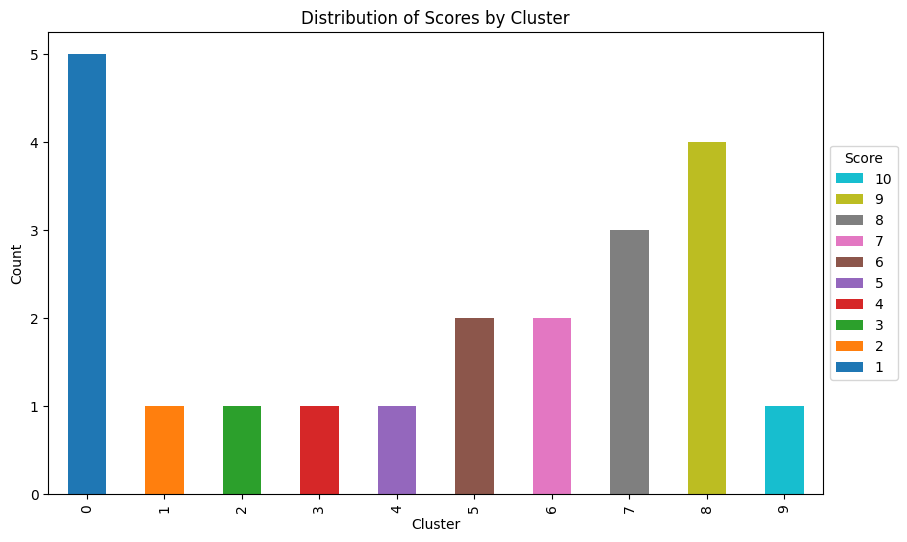

In [9]:
import matplotlib.pyplot as plt

# Calculate counts of individuals in each cluster and score
counts = data.groupby(['cluster', 'score']).size().unstack(fill_value=0)

# Plot stacked bar chart
fig, ax = plt.subplots(figsize=(10, 6))
counts.plot(kind='bar', stacked=True, ax=ax)

# Set axis labels and title
ax.set_xlabel('Cluster')
ax.set_ylabel('Count')
ax.set_title('Distribution of Scores by Cluster')

# Add legend
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[::-1], labels[::-1], title='Score', loc='center left', bbox_to_anchor=(1, 0.5))


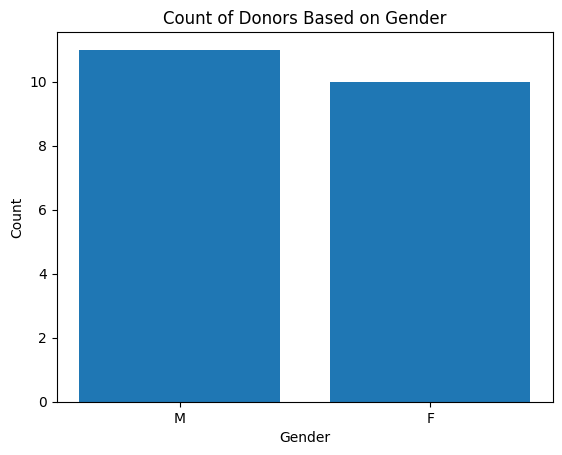

In [13]:
import pandas as pd
import matplotlib.pyplot as plt


# Count the number of donors based on gender
gender_count = data['GENDER'].value_counts()

# Create a bar graph to visualize the gender count
fig, ax = plt.subplots()
ax.bar(gender_count.index, gender_count.values)

# Add labels and title to the graph
ax.set_xlabel('Gender')
ax.set_ylabel('Count')
ax.set_title('Count of Donors Based on Gender')

# Display the graph
plt.show()


In [15]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans


# Select relevant columns for clustering
X = data[['FIRST_GIFT_AMOUNT', 'TOTAL_NUMBER_GIFTS', 'LARGEST_GIFT_AMOUNT', 'TOTAL_GIFT_AMOUNT', 'TOTAL_INCOME', 'TOTAL_NETWORTH', 'LAST_GIFT_AMOUNT', 'TOTAL_DONATIONS', 'TOTAL_EAD', 'LARGEST_REALEST_VALUE', 'TOTAL_NO_EVENTS_PARTICIPATED', 'TOTAL_YEARS_GIVING']]

# Scale the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train K-means model
kmeans = KMeans(n_clusters=10, random_state=42)
kmeans.fit(X_scaled)

# Add the cluster labels to the original dataframe
data['Cluster'] = kmeans.labels_

# Display the number of individuals in each cluster
print(data['Cluster'].value_counts())


0    7
6    5
8    2
9    1
5    1
7    1
3    1
2    1
1    1
4    1
Name: Cluster, dtype: int64


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
<ipython-input-15-7299c8a2d99b>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Cluster'] = kmeans.labels_


In [19]:
X

,FIRST_GIFT_AMOUNT,TOTAL_NUMBER_GIFTS,LARGEST_GIFT_AMOUNT,TOTAL_GIFT_AMOUNT,TOTAL_INCOME,TOTAL_NETWORTH,LAST_GIFT_AMOUNT,TOTAL_DONATIONS,TOTAL_EAD,LARGEST_REALEST_VALUE,TOTAL_NO_EVENTS_PARTICIPATED,TOTAL_YEARS_GIVING
2078,50.0,9.0,1500.0,2924.00,375000,10127087,100.0,6595,28084,992209,1.0,2924.00
3132,250.0,11.0,2500.0,7975.00,112500,507990,1000.0,7975,2119,0,1.0,7975.00
3723,40.0,24.0,4500.0,17245.00,68000,805290,500.0,17245,1827,480555,0.0,17245.00
4517,100.0,15.0,1800.0,5271.17,87500,373822,120.0,7701,1877,0,0.0,5271.17
5111,210.0,52.0,500.0,5013.65,187500,1290825,75.0,5014,3765,0,0.0,5013.65
6781,10.0,15.0,1000.0,4479.00,187500,3480318,600.0,6354,5612,522493,4.0,4479.00
7042,1000.0,1.0,1000.0,1000.00,225000,3531986,1000.0,1000,5946,882836,0.0,1000.00
9083,250.0,15.0,250.0,1622.70,125000,1421803,100.0,1623,3693,746033,1.0,1622.70
11274,200.0,12.0,1000.0,2919.00,123000,893013,200.0,2919,2256,315830,0.0,2919.00
12596,100.0,5.0,180.0,459.00,225000,4584098,45.0,482,5508,579463,0.0,459.00


In [17]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Assuming X is the input data
# Set the number of clusters (k) to 10
k = 10

# Initialize KMeans object with the specified number of clusters
kmeans = KMeans(n_clusters=k, random_state=42)

# Fit the KMeans object to the input data and obtain the cluster labels
y_cluster = kmeans.fit_predict(X)

# Calculate the Silhouette Score
silhouette_avg = silhouette_score(X, y_cluster)

print("The average silhouette_score is :", silhouette_avg)


The average silhouette_score is : 0.4004539045890184


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


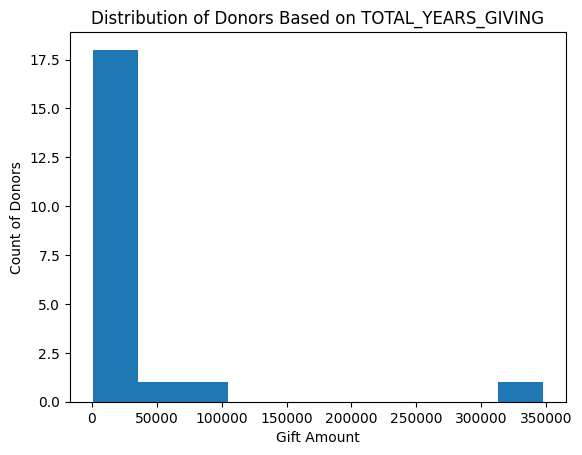

In [27]:
import matplotlib.pyplot as plt

# create a bar graph of gift amount distribution
plt.hist(data['TOTAL_YEARS_GIVING'], bins=10)
plt.title('Distribution of Donors Based on TOTAL_YEARS_GIVING')
plt.xlabel('Gift Amount')
plt.ylabel('Count of Donors')
plt.show()




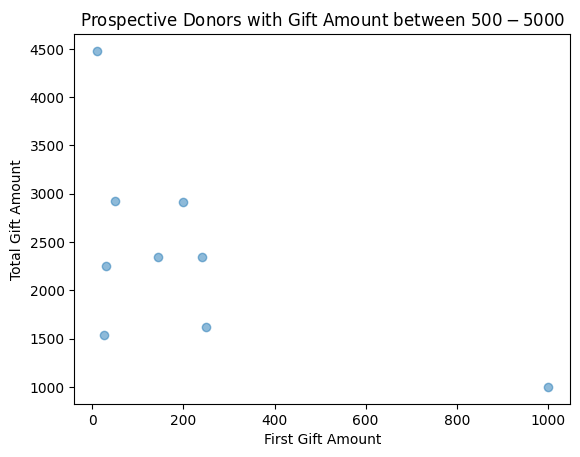

In [31]:
import matplotlib.pyplot as plt

# select the prospective donors whose gift amount lies between $500-$5000
prospective_donors = data[(data['TOTAL_GIFT_AMOUNT'] >= 500) & (data['TOTAL_GIFT_AMOUNT'] <= 5000)]

# create the scatter plot
plt.scatter(prospective_donors['FIRST_GIFT_AMOUNT'], prospective_donors['TOTAL_YEARS_GIVING'], alpha=0.5)

# set the title and axis labels
plt.title('Prospective Donors with Gift Amount between $500-$5000')
plt.xlabel('First Gift Amount')
plt.ylabel('Total Gift Amount')

# display the plot
plt.show()


In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Identify prospective donors
prospective_donors_list = data['ID'].tolist()
print(f"There are {len(prospective_donors_list)} prospective donors whose gift amount lies between $500-$5000:")
print(prospective_donors_list)


There are 21 prospective donors whose gift amount lies between $500-$5000:
[2079, 3133, 3724, 4518, 5112, 6782, 7043, 9084, 11275, 12597, 15073, 16652, 17732, 17767, 19510, 21357, 21385, 22490, 23255, 25574, 25877]
